This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fconference-ia/master?urlpath=lab/tree/notebooks/3_principal_component_analysis/)

# Compare two transformation method on the IRIS data set: 

  - Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

  - Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance *between classes*. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.


In [1]:
import matplotlib
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and standardize the data
iris = load_iris()
X = iris.data ;  y = iris.target 
# load_iris(return_X_y=True)
sc = StandardScaler()
X = sc.fit_transform(X)

### Plot some pairs of features

Text(0, 0.5, 'petal width (cm)')

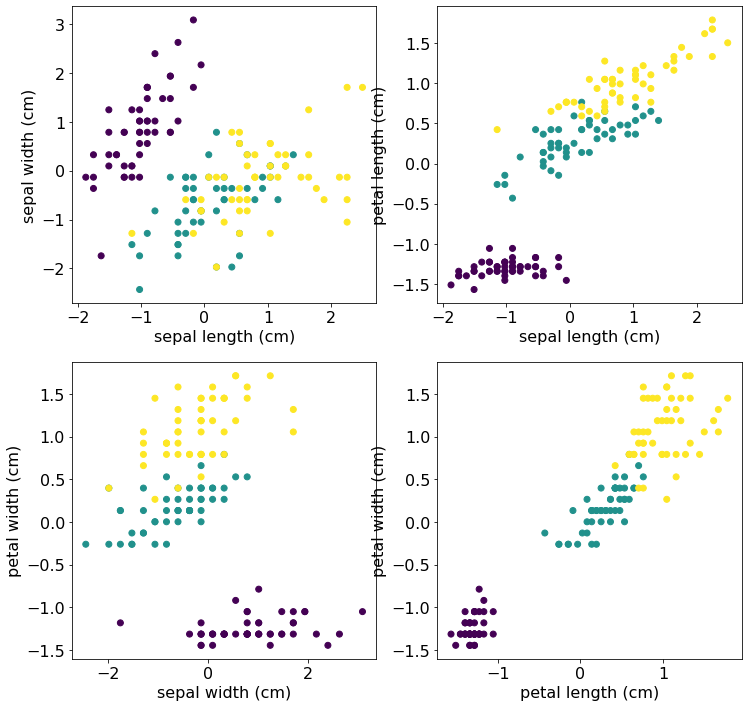

In [2]:
f, axes = plt.subplots(2,2,figsize=(12, 12))
# Axe 1 and 2
axes[0,0].scatter(X[:,0], X[:,1],c=iris.target,)
axes[0,0].set_xlabel(iris.feature_names[0])
axes[0,0].set_ylabel(iris.feature_names[1])

# Axe 1 and 3
axes[0,1].scatter(X[:,0], X[:,2],c=iris.target,)
axes[0,1].set_xlabel(iris.feature_names[0])
axes[0,1].set_ylabel(iris.feature_names[2])

# Axe 2 and 4
axes[1,0].scatter(X[:,1], X[:,3],c=iris.target,)
axes[1,0].set_xlabel(iris.feature_names[1])
axes[1,0].set_ylabel(iris.feature_names[3])

# Axe 3 and 4
axes[1,1].scatter(X[:,2], X[:,3],c=iris.target)
axes[1,1].set_xlabel(iris.feature_names[2])
axes[1,1].set_ylabel(iris.feature_names[3])


## PCA

We apply  PCA transformation to the dataset, and plot the cumulative variance

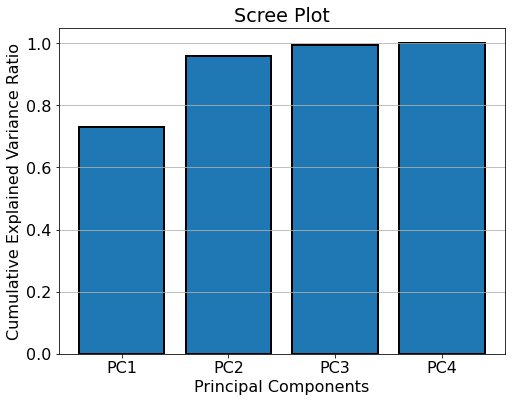

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
l = pca.explained_variance_

PC_values = np.arange(pca.n_components_) + 1
PC_labels = ['PC' + str(nb+1) for nb in range(pca.n_components_)] 
plt.figure(figsize=(8,6))
plt.bar(PC_values, l.cumsum()/l.sum(), linewidth=2, edgecolor='k')
plt.xticks(ticks=PC_values, labels=PC_labels)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(axis='y')
plt.show()


We can project the data on the first two PCs 

Text(0, 0.5, 'PC2')

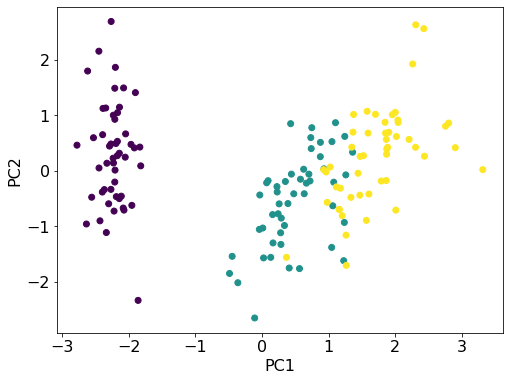

In [4]:
Xp = pca.transform(X) # linear projection along the axes that maximize the dispersion (variance) 

f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Xp[:,0], Xp[:,1],c=y) # plot the 2 first components
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

## LDA

We apply now  LDA transformation to find the directions (vectors) that maximizes the class separation, and plot their cumulative variance ratio to explain the Fisher linear discriminant separation criterion

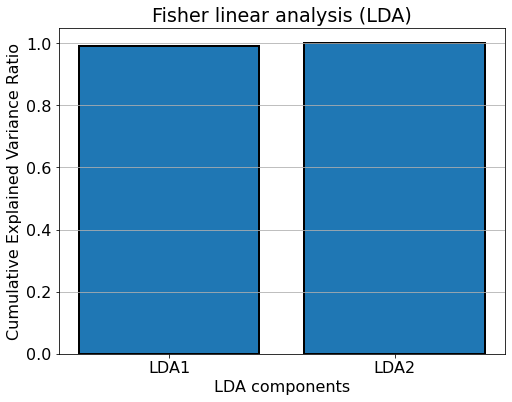

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X, y)
l = lda.explained_variance_ratio_


LDA_values = np.arange(2) + 1
LDA_labels = ['LDA' + str(nb+1) for nb in range(2)] 
plt.figure(figsize=(8,6))
plt.bar(LDA_values, l.cumsum()/l.sum(), linewidth=2, edgecolor='k')
plt.xticks(ticks=LDA_values, labels=LDA_labels)
plt.title('Fisher linear analysis (LDA)')
plt.xlabel('LDA components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(axis='y')
plt.show()

Remember that in LDA we assume that all classes have the same estimated covariance. Thus we can rescale the data so that this covariance is the identity. Then one can show that to classify a data point after scaling is equivalent to finding the estimated class mean which is closest to the data point in the Euclidean distance (see course). But this can be done just as well after projecting on the affine subspace generated by all the (rescaled) means for all classes. 

This shows that, implicit in the LDA classifier, there is a *dimensionality reduction by linear projection onto a $K-1$ dimensional space*, where $K$ is the total number of target classes. 

Text(0, 0.5, 'LDA2')

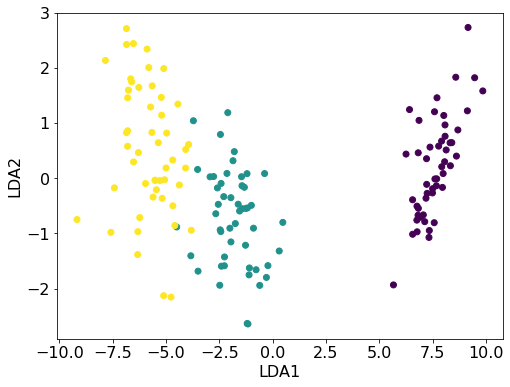

In [6]:
Xp = lda.transform(X) # linear projection to maximize class separation for the fitted LDA model 

f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Xp[:,0], Xp[:,1],c=y) # plot the 2 LDA vectors
ax.set_xlabel('LDA1')
ax.set_ylabel('LDA2')

### Exercise
- Does the PCA requires the class label to transform the dataset? 
- How many PCA principal component seems sufficient to mostly  explain the variance of this dataset?
- How many PCA principal component seems sufficient to get a quite accurate separation between the classes?
- Explain why the explained variance ratio is 1 for the LDA with two components. 
- Does LDA allows us to get an accurate separation between the classes when using only the first LDA vector?
- Do you think that PCA can be useful to transform this dataset for visualization or dimension reduction?